In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
MouseDrugs = pd.read_csv(mouse_drug_data_to_load)
ClinTrials = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
CombData = pd.merge(ClinTrials, MouseDrugs, on = "Mouse ID", how="left")

# Display the data table for preview

CombData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
CombDataGrouped = CombData.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"]
AvgTumors = CombDataGrouped.mean()
# Convert to DataFrame
AvgTumors = AvgTumors.reset_index()
# Preview DataFrame
AvgTumors.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
TumorsSte = CombDataGrouped.sem()
# Convert to DataFrame
TumorsSte = pd.DataFrame(TumorsSte)
# Preview DataFrame
TumorsSte.reset_index(inplace = True)
TumorsSte

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [4]:
# Minor Data Munging to Re-Format the Data Frames
AvgTumorsClean = AvgTumors.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
# Preview that Reformatting worked
AvgTumorsClean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [15]:
# Generate the Plot (with Error Bars)
DrugsList = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug, marker, colors in DrugsList:
    ste = TumorsSte[drug]
    TumorsPlot = plt.errorbar(AvgTumorsClean.index, AvgTumorsClean[drug], ste, fmt = marker, ls='--', colors=colors, linewidth=0.75)

plt.legend(loc="best")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
# Save the Figure
plt.savefig(os.path.join("figures", "TumorTreatmentResponse.png"))

KeyError: 'Capomulin'

In [ ]:
plt.show()

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
MouseGrouped = CombData.groupby(["Drug", "Timepoint"])["Mouse ID"]
MouseCount = MouseGrouped.nunique()
MouseCount = pd.DataFrame(MouseCount)
# Convert to DataFrame
MouseCount.reset_index(inplace = True)
MouseCount = MouseCount.rename(columns = {"Mouse ID": "Mouse Count"})
# Preview DataFrame
MouseCount

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
5,Capomulin,25,22
6,Capomulin,30,22
7,Capomulin,35,22
8,Capomulin,40,21
9,Capomulin,45,21


In [12]:
# Minor Data Munging to Re-Format the Data Frames
MouseCountPivot = MouseCount.pivot(index = "Timepoint", columns ="Drug", values = "Mouse Count")
# Preview the Data Frame
MouseCountPivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


NameError: name 'path' is not defined

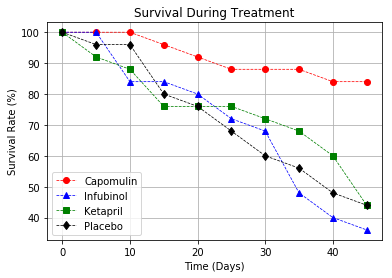

In [17]:
# Generate the Plot (Accounting for percentages)
for drug, marker, colors in DrugsList:
    MouseTotals = MouseCountPivot[drug][0]
    SurvRate = (MouseCountPivot[drug]/MouseTotals)*100
    SurvPlot = plt.plot(MouseCountPivot.index, SurvRate, marker = marker, ls='--', color = colors, linewidth = 0.75)


# Show the Figure
plt.legend(loc="best")
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.savefig(path.join("figures", "TreatmentSurvivalRates.png"))

In [18]:
# Calculate the percent changes for each drug
PctChange = (AvgTumorsClean.iloc[-1]/(AvgTumorsClean.iloc[0])-1)*100
# Display the data to confirm
PctChange

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

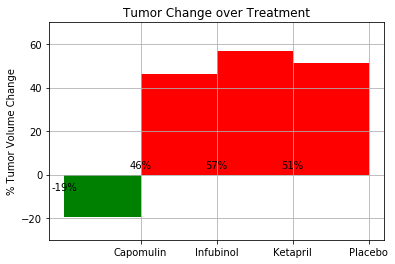

In [21]:
# Store all Relevant Percent Changes into a Tuple
passing = PctChange < 0

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 
DrugsList2 = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
ChangeList = [(PctChange[drug]) for drug in DrugsList2]
ChangePlot = plt.bar(DrugsList2, ChangeList, width =-1, align="edge", color=passing.map({True: "g", False:"r"}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change over Treatment")
# Use functions to label the percentages of changes
def labelfcn(things):
    for thing in things:
        height = thing.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
        plt.text(thing.get_x() + thing.get_width(), label_position, '%d' % int(height) + "%", ha="center", va="bottom")

# Call functions to implement the function calls
labelfcn(ChangePlot)

# Save the Figure


# Show the Figure